In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle  


In [3]:
df = pd.read_csv('C:/Users/errt/OneDrive/Bureau/Projets/Big-Data/Python/Simulateur-Credit/train_u6lujuX_CVtuZ9i.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
cat_data=[]
num_data=[]
for i,c in enumerate(df.dtypes):
    if c==object:
        cat_data.append(df.iloc[:,i])
    else:
        num_data.append(df.iloc[:,i])



In [9]:
cat_data

[0      LP001002
 1      LP001003
 2      LP001005
 3      LP001006
 4      LP001008
          ...   
 609    LP002978
 610    LP002979
 611    LP002983
 612    LP002984
 613    LP002990
 Name: Loan_ID, Length: 614, dtype: object,
 0        Male
 1        Male
 2        Male
 3        Male
 4        Male
         ...  
 609    Female
 610      Male
 611      Male
 612      Male
 613    Female
 Name: Gender, Length: 614, dtype: object,
 0       No
 1      Yes
 2      Yes
 3      Yes
 4       No
       ... 
 609     No
 610    Yes
 611    Yes
 612    Yes
 613     No
 Name: Married, Length: 614, dtype: object,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 609     0
 610    3+
 611     1
 612     2
 613     0
 Name: Dependents, Length: 614, dtype: object,
 0          Graduate
 1          Graduate
 2          Graduate
 3      Not Graduate
 4          Graduate
            ...     
 609        Graduate
 610        Graduate
 611        Graduate
 612        Graduate
 613   

In [10]:
num_data

[0      5849
 1      4583
 2      3000
 3      2583
 4      6000
        ... 
 609    2900
 610    4106
 611    8072
 612    7583
 613    4583
 Name: ApplicantIncome, Length: 614, dtype: int64,
 0         0.0
 1      1508.0
 2         0.0
 3      2358.0
 4         0.0
         ...  
 609       0.0
 610       0.0
 611     240.0
 612       0.0
 613       0.0
 Name: CoapplicantIncome, Length: 614, dtype: float64,
 0        NaN
 1      128.0
 2       66.0
 3      120.0
 4      141.0
        ...  
 609     71.0
 610     40.0
 611    253.0
 612    187.0
 613    133.0
 Name: LoanAmount, Length: 614, dtype: float64,
 0      360.0
 1      360.0
 2      360.0
 3      360.0
 4      360.0
        ...  
 609    360.0
 610    180.0
 611    360.0
 612    360.0
 613    360.0
 Name: Loan_Amount_Term, Length: 614, dtype: float64,
 0      1.0
 1      1.0
 2      1.0
 3      1.0
 4      1.0
       ... 
 609    1.0
 610    1.0
 611    1.0
 612    1.0
 613    0.0
 Name: Credit_History, Length: 614, dtype: f

In [11]:
cat_data=pd.DataFrame(cat_data).transpose()
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [12]:
num_data=pd.DataFrame(num_data).transpose()
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [13]:
#Remplacer les valeurs manquantes par la valeur la plus fréquente dans les colonnes catégorielles
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

False

In [14]:
# Remplacer les valeurs manquantes dans les colonnes numériques par la valeur précédente
num_data.bfill(inplace=True)
num_data.isnull().sum().any()

False

In [15]:
num_data.transpose()

,0,1,2,3,4,5,6,7,8,9,...,604,605,606,607,608,609,610,611,612,613
ApplicantIncome,5849.0,4583.0,3000.0,2583.0,6000.0,5417.0,2333.0,3036.0,4006.0,12841.0,...,12000.0,2400.0,3400.0,3987.0,3232.0,2900.0,4106.0,8072.0,7583.0,4583.0
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0,4196.0,1516.0,2504.0,1526.0,10968.0,...,0.0,3800.0,2500.0,1411.0,1950.0,0.0,0.0,240.0,0.0,0.0
LoanAmount,128.0,128.0,66.0,120.0,141.0,267.0,95.0,158.0,168.0,349.0,...,496.0,173.0,173.0,157.0,108.0,71.0,40.0,253.0,187.0,133.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,360.0,...,360.0,180.0,360.0,360.0,360.0,360.0,180.0,360.0,360.0,360.0
Credit_History,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [16]:
#Trasformer la colonne 'Target'de manière manuelle
target_value={'Y':1,'N':0}
target=cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1,inplace=True)
target=target.map(target_value)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [17]:
#Remplacer les valeurs categoriques par 0 et 1,2...
le=LabelEncoder()
for i in cat_data:
    cat_data[i]=le.fit_transform(cat_data[i])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [18]:
#supprimer loan_id
cat_data.drop('Loan_ID',axis=1,inplace=True)

In [19]:
#concatener cat_data et num_data et spécifier la colonne target
x=pd.concat([cat_data,num_data],axis=1)
y=target

In [20]:
x

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0
610,1,1,3,0,0,0,4106.0,0.0,40.0,180.0,1.0
611,1,1,1,0,0,2,8072.0,240.0,253.0,360.0,1.0
612,1,1,2,0,0,2,7583.0,0.0,187.0,360.0,1.0


In [21]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [22]:
#Analyse exploratoire
target.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

le pourcentage des crédits accordés est: 0.3127035830618892
le pourcentage des crédits non accordés est: 0.6872964169381107


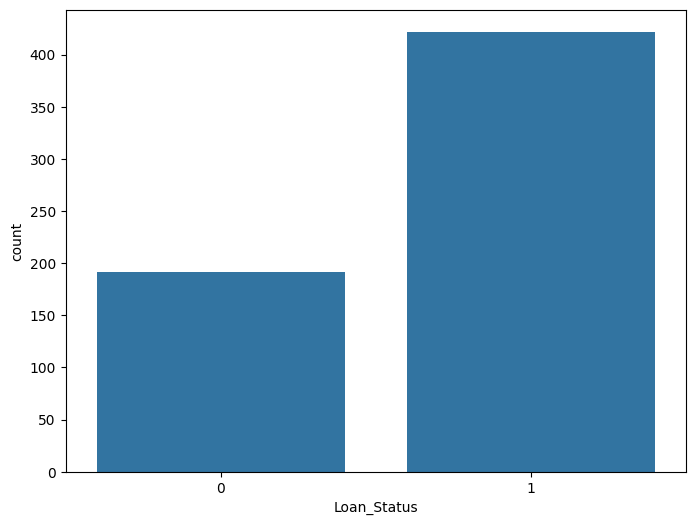

In [23]:
# variable target
plt.figure(figsize=(8,6))
# Affichage des barres en considérant 'target' comme une variable catégorique (0 et 1 interprétés comme des catégories)
sns.countplot(x=target.astype('category'))
yes=target.value_counts()[0]/len(target)
no=target.value_counts()[1]/len(target)
print(f'le pourcentage des crédits accordés est: {yes}')
print(f'le pourcentage des crédits non accordés est: {no}')

c:\Users\errt\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


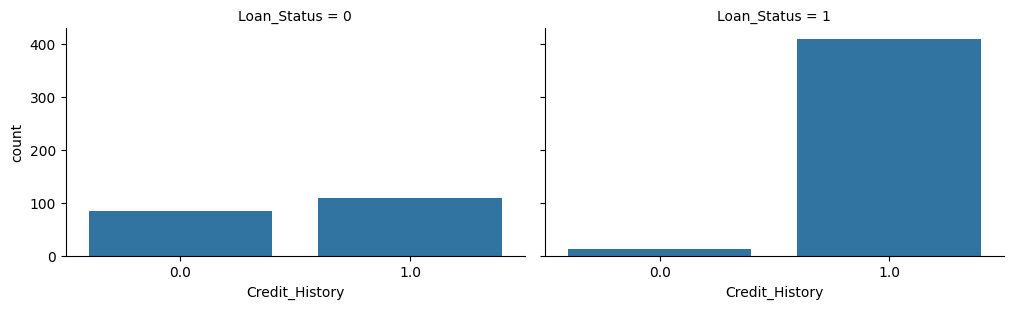

In [24]:
df=pd.concat([cat_data,num_data,target],axis=1)
# variable credit history 
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History')

c:\Users\errt\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


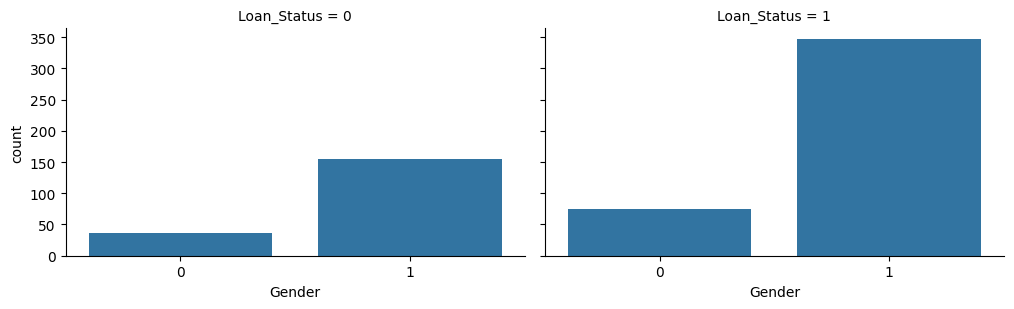

In [25]:
# variable Gender
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender')

c:\Users\errt\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


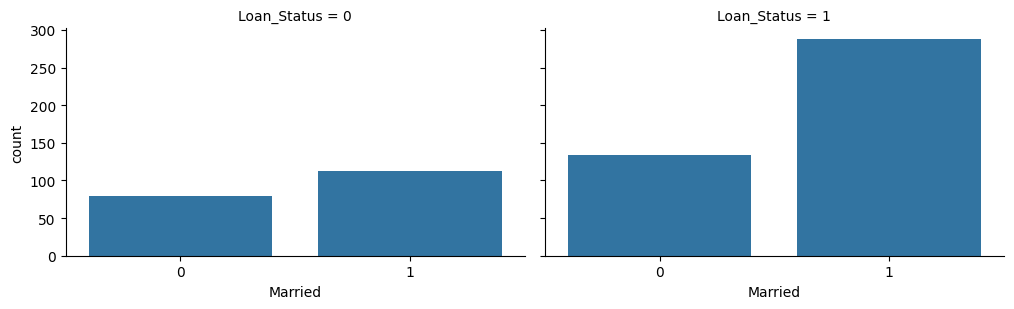

In [26]:
# variable Married
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Married')

c:\Users\errt\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


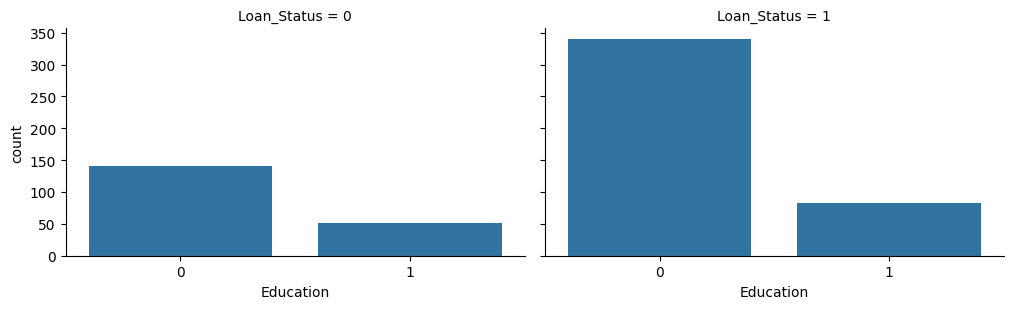

In [27]:
# variable Education
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education')

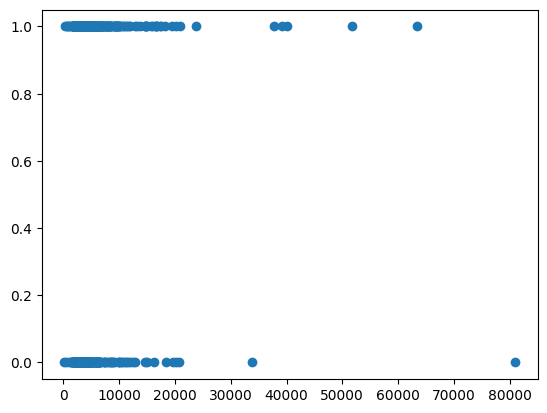

In [28]:
# revenue de demandeur
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])

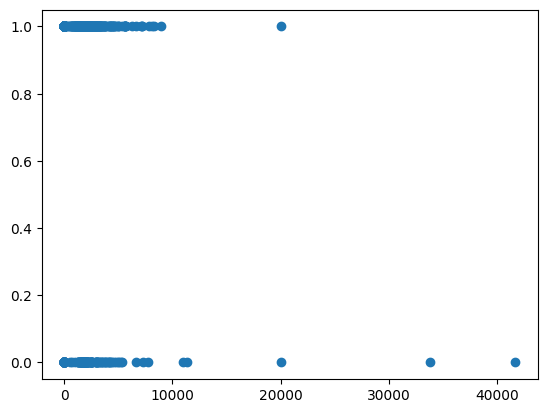

In [29]:
plt.scatter(df['CoapplicantIncome'],df['Loan_Status'])

In [30]:
df.groupby('Loan_Status').median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1.0,1.0,0.0,0.0,0.0,1.0,3833.5,268.0,132.5,360.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,3812.5,1239.5,127.5,360.0,1.0


In [31]:
#Diviser la base de données en une base de données test et d'entrainement
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train,test in sss.split(x,y):
    x_train,x_test=x.iloc[train],x.iloc[test]
    y_train,y_test=y.iloc[train],y.iloc[test]
    print('x_train taille: ',x_train.shape)
    print('x_test taille: ',x_test.shape)
    print('y_train taille: ',y_train.shape)
    print('y_test taille: ',y_test.shape)

x_train taille:  (491, 11)
x_test taille:  (123, 11)
y_train taille:  (491,)
y_test taille:  (123,)


In [32]:
# appliquer 3 algos
models={
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1,random_state=42)
}

# fonction de précision
def accu(y_true,y_pred,retu=False):
    acc=accuracy_score(y_true,y_pred)
    if retu:
        return acc
    else:
        print(f'la précision du modéle est: {acc}')

# fonction d'application des modèles

def train_test_eval(models,x_train,y_train,x_test,y_test):
    for name,model in models.items():
        print(name, ':')
        model.fit(x_train,y_train)
        accu(y_test,model.predict(x_test))
        print('-'*30)

train_test_eval(models,x_train,y_train,x_test,y_test)

LogisticRegression :
la précision du modéle est: 0.8536585365853658
------------------------------
KNeighborsClassifier :
la précision du modéle est: 0.6504065040650406
------------------------------
DecisionTreeClassifier :
la précision du modéle est: 0.8455284552845529
------------------------------


c:\Users\errt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
#Notre db
x_2=x[['Credit_History','Married','CoapplicantIncome']]

sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train,test in sss.split(x_2,y):
    x_train,x_test=x_2.iloc[train],x_2.iloc[test]
    y_train,y_test=y.iloc[train],y.iloc[test]
    print('x_train taille: ',x_train.shape)
    print('x_test taille: ',x_test.shape)
    print('y_train taille: ',y_train.shape)
    print('y_test taille: ',y_test.shape)

train_test_eval(models,x_train,y_train,x_test,y_test)

x_train taille:  (491, 3)
x_test taille:  (123, 3)
y_train taille:  (491,)
y_test taille:  (123,)
LogisticRegression :
la précision du modéle est: 0.8536585365853658
------------------------------
KNeighborsClassifier :
la précision du modéle est: 0.6991869918699187
------------------------------
DecisionTreeClassifier :
la précision du modéle est: 0.8455284552845529
------------------------------


In [ ]:
# Appliquer LogisticRegression
Classifier=LogisticRegression()
Classifier.fit(x_2,y)

# Afficher tous les paramètres après l'entraînement
params = Classifier.get_params()
for param, value in params.items():
    print(f"{param}: {value}")

C: 1.0
class_weight: None
dual: False
fit_intercept: True
intercept_scaling: 1
l1_ratio: None
max_iter: 100
multi_class: auto
n_jobs: None
penalty: l2
random_state: None
solver: lbfgs
tol: 0.0001
verbose: 0
warm_start: False


In [46]:
#Enrigistrer le modèle
pickle.dump(Classifier,open('model.pkl','wb'))